In [1]:
import pandas as pd
import datetime 
from datetime import timedelta

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import math

In [2]:
volume18 = pd.read_csv('DATA/Clean/2018VolumeByWeek.csv')
volume18.head()

,Unnamed: 0,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,...,NE Q4 Heavy Up \ TV,NE Q4 Heavy Up \ Radio,NE Q4 Heavy Up \ OOH,BASEBALL,BILLBOARD,DIGITAL,RADIO,SPONSORSHIP,TV,VOD
0,0,1/1/18,1715897.724,1.141203e+06,7.037752e+05,11874.46896,725089.7700,0.089623,0.057783,0.033019,...,0,0,0,0.0,0,0.0,0.0,0,0.00,0.00
1,1,1/8/18,1435106.907,9.135088e+05,3.892043e+05,38589.27999,615666.6837,0.090482,0.057579,0.022327,...,0,0,0,0.0,0,0.0,0.0,0,0.00,0.00
2,2,1/15/18,1392563.409,8.978826e+05,4.334663e+05,34808.71644,595837.1872,0.091873,0.057715,0.020024,...,0,0,0,0.0,0,0.0,0.0,0,325950.65,37496.71
3,3,1/22/18,1393401.237,9.541495e+05,6.197307e+05,47374.39127,606422.4579,0.089202,0.057512,0.023474,...,0,0,0,0.0,0,0.0,0.0,0,321946.30,37496.71
4,4,1/29/18,1938644.818,1.418473e+06,1.191214e+06,480359.05080,971064.1176,0.090376,0.057512,0.035211,...,0,0,0,0.0,0,0.0,0.0,0,189397.90,37295.74


In [3]:
volume18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             53 non-null     int64  
 1   week_start                             53 non-null     object 
 2   volume_sales                           53 non-null     float64
 3   volume_sales_merch                     53 non-null     float64
 4   volume_sales_price_reduce              53 non-null     float64
 5   volume_sales_feature                   53 non-null     float64
 6   volume_sales_display                   53 non-null     float64
 7   chicken_meal_deal                      53 non-null     float64
 8   sec_deli                               53 non-null     float64
 9   sec_bakery                             53 non-null     float64
 10  sec_center                             53 non-null     float64
 11  retail_c

In [4]:
volume18['week_start'] = pd.to_datetime(volume18['week_start'])

In [5]:
volume18['holiday'].value_counts()

None             33
Christmas/NY      5
Easter Week       4
Thanksgiving      3
Halloween         3
Memorial Week     2
July 4th          2
Labor Day         1
Name: holiday, dtype: int64

Notes: chicken_meal_deal, sec_deli ,sec_bakery,  sec_center are grouped by week and aggregated by mean, which is the percentage of products being put in a deal in that week, across all the product, all the stores. 


In [6]:
volume18_new = pd.get_dummies(volume18)
volume18_new = volume18_new.drop(['Unnamed: 0','holiday_None'], axis = 'columns')

In [7]:
volume18_new.shape

(53, 57)

In [8]:
volume18_new.head()

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,...,SPONSORSHIP,TV,VOD,holiday_Christmas/NY,holiday_Easter Week,holiday_Halloween,holiday_July 4th,holiday_Labor Day,holiday_Memorial Week,holiday_Thanksgiving
0,2018-01-01,1715897.724,1.141203e+06,7.037752e+05,11874.46896,725089.7700,0.089623,0.057783,0.033019,0.135613,...,0,0.00,0.00,1,0,0,0,0,0,0
1,2018-01-08,1435106.907,9.135088e+05,3.892043e+05,38589.27999,615666.6837,0.090482,0.057579,0.022327,0.128085,...,0,0.00,0.00,0,0,0,0,0,0,0
2,2018-01-15,1392563.409,8.978826e+05,4.334663e+05,34808.71644,595837.1872,0.091873,0.057715,0.020024,0.129564,...,0,325950.65,37496.71,0,0,0,0,0,0,0
3,2018-01-22,1393401.237,9.541495e+05,6.197307e+05,47374.39127,606422.4579,0.089202,0.057512,0.023474,0.127934,...,0,321946.30,37496.71,0,0,0,0,0,0,0
4,2018-01-29,1938644.818,1.418473e+06,1.191214e+06,480359.05080,971064.1176,0.090376,0.057512,0.035211,0.127934,...,0,189397.90,37295.74,0,0,0,0,0,0,0


In [9]:
week_effect =volume18_new['week_start'] 

In [10]:
delta = timedelta(weeks = 2)

volume18_new['week_effect'] = volume18_new['week_start']  + delta 

In [11]:
volume18_new.head(3)

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,...,TV,VOD,holiday_Christmas/NY,holiday_Easter Week,holiday_Halloween,holiday_July 4th,holiday_Labor Day,holiday_Memorial Week,holiday_Thanksgiving,week_effect
0,2018-01-01,1715897.724,1.141203e+06,703775.2260,11874.46896,725089.7700,0.089623,0.057783,0.033019,0.135613,...,0.00,0.00,1,0,0,0,0,0,0,2018-01-15
1,2018-01-08,1435106.907,9.135088e+05,389204.3256,38589.27999,615666.6837,0.090482,0.057579,0.022327,0.128085,...,0.00,0.00,0,0,0,0,0,0,0,2018-01-22
2,2018-01-15,1392563.409,8.978826e+05,433466.2757,34808.71644,595837.1872,0.091873,0.057715,0.020024,0.129564,...,325950.65,37496.71,0,0,0,0,0,0,0,2018-01-29


In [12]:
volume18_new.columns

Index(['week_start', 'volume_sales', 'volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter',
       'holiday_binary', 'ABC - SCS Sponsorship', 'ABC - Media (TV)',
       'ABC - Media (Digital)', 'Tonnage - Weather Channel',
       'Tonnage - Simulmedia', 'Tonnage - Simumedia Matchback',
       'Tonnage - AudienceXpress', 'Tonnage - Fox & Friends',
       'Tonnage - Hallmark', 'Scripps - Food Network',
       'Scripps - Cooking Channel', 'Scripps - HGTV', 'Scripps - DIY',
       'Scripps - Travel', 'Scripps - GAC', 'VOD - CBS', 'VOD - NBC',
       'VOD - HULU', 'Local Radio - "Best Block Party Ever"',
       'Yankees \KH Grill', 'Baseball', 'ATT - Direct TV', 'CFB - FS1',
       'CFB - FSGO', 'NE Q4 Heavy Up \ TV', 'NE Q4 Heavy Up \ Radio',
       'NE Q4 Heavy Up \ OOH', 'BASEBALL', 'BILLBOARD', 'DIGITAL', 'RADIO

In [13]:
variables = volume18_new[[ 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter','BASEBALL', 'BILLBOARD', 'DIGITAL', 'RADIO',
       'SPONSORSHIP', 'TV', 'VOD', 'holiday_Christmas/NY',
       'holiday_Easter Week', 'holiday_Halloween', 'holiday_July 4th',
       'holiday_Labor Day', 'holiday_Memorial Week', 'holiday_Thanksgiving',
       'week_start']]
sales =volume18_new[['volume_sales','volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display','week_effect']]



In [14]:
merge_data = variables.merge(sales,left_on = 'week_start',right_on ='week_effect' )


In [15]:
from sklearn.preprocessing import StandardScaler

numeric_cols = merge_data.select_dtypes(include=[np.number])
categoric_cols = merge_data.select_dtypes(include=[object])
scaler = StandardScaler()
# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)
# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
merge_data = final_DF

In [16]:
X = merge_data.drop(['volume_sales','quarter','week','month','year'], axis = 1) 
y = merge_data['volume_sales']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state =1)                                                 
model = LinearRegression()
model.fit(X_train,y_train)                                                   
                                                    
model.coef_                                                                       

array([-2.36799037e-02,  3.03641882e-02, -1.43864958e-02, -1.61434075e-02,
       -2.87112305e-02, -1.08834436e-02, -4.99600361e-16, -6.94818847e-03,
       -8.43444573e-03,  1.97225692e-02, -2.28402494e-02,  1.99572638e-02,
       -1.88012372e-02, -1.60462800e-02,  5.76521768e-03, -1.41965807e-02,
       -1.94289029e-16,  5.52062241e-03, -1.25254743e-02,  2.11076328e-01,
        7.73971454e-02, -1.74468951e-01,  8.72545686e-01])

In [17]:
X_train.columns

Index(['chicken_meal_deal', 'sec_deli', 'sec_bakery', 'sec_center',
       'retail_cover', 'BASEBALL', 'BILLBOARD', 'DIGITAL', 'RADIO',
       'SPONSORSHIP', 'TV', 'VOD', 'holiday_Christmas/NY',
       'holiday_Easter Week', 'holiday_Halloween', 'holiday_July 4th',
       'holiday_Labor Day', 'holiday_Memorial Week', 'holiday_Thanksgiving',
       'volume_sales_merch', 'volume_sales_price_reduce',
       'volume_sales_feature', 'volume_sales_display'],
      dtype='object')

In [18]:

for i, col in enumerate(X_train.columns):
    print(col + "\t: ", round(model.coef_[i], 2))

chicken_meal_deal	:  -0.02
sec_deli	:  0.03
sec_bakery	:  -0.01
sec_center	:  -0.02
retail_cover	:  -0.03
BASEBALL	:  -0.01
BILLBOARD	:  -0.0
DIGITAL	:  -0.01
RADIO	:  -0.01
SPONSORSHIP	:  0.02
TV	:  -0.02
VOD	:  0.02
holiday_Christmas/NY	:  -0.02
holiday_Easter Week	:  -0.02
holiday_Halloween	:  0.01
holiday_July 4th	:  -0.01
holiday_Labor Day	:  -0.0
holiday_Memorial Week	:  0.01
holiday_Thanksgiving	:  -0.01
volume_sales_merch	:  0.21
volume_sales_price_reduce	:  0.08
volume_sales_feature	:  -0.17
volume_sales_display	:  0.87


In [19]:
model.intercept_

0.0069479436871127676

In [20]:
model.score(X_test, y_test)

0.9933488291593878

In [21]:
y_predict = model.predict(X_test)
MSE = mean_squared_error(y_predict, y_test)
MSE

0.006587227597649856

In [22]:
((y_test - y_predict)**2).mean()

0.006587227597649856

In [23]:
math.sqrt(MSE)

0.08116173727594707

In [24]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures

In [25]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8

In [26]:
# print(f'degree\tRMSE\ttest_score')
# for degree in range(degree_min,degree_max+1):
    
#     model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
# normalize=True,cv=5))
#     model.fit(X_train,y_train)
#     test_pred = np.array(model.predict(X_test))
#     RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
#     test_score = model.score(X_test,y_test)
# print(f'{degree},{tRMSE},{ttest_score}')
      

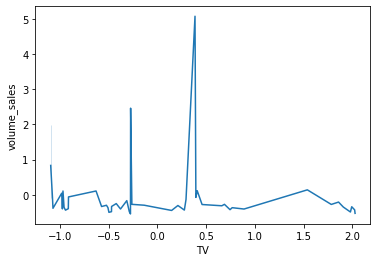

In [27]:
sns.lineplot(data = merge_data, x = 'TV', y = 'volume_sales')

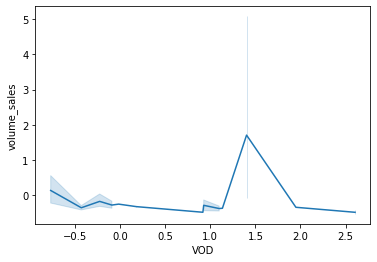

In [28]:
sns.lineplot(data = merge_data, x = 'VOD', y = 'volume_sales')

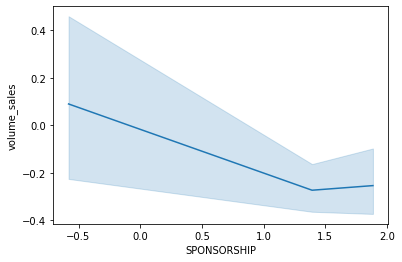

In [29]:
sns.lineplot(data = merge_data, x = 'SPONSORSHIP', y = 'volume_sales')

## During non-holiday

In [30]:
variables2 = volume18_new[[ 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter','BASEBALL', 'BILLBOARD', 'DIGITAL', 'RADIO',
       'SPONSORSHIP', 'TV', 'VOD','holiday_binary',
       'week_start']]
sales2 =volume18_new[['volume_sales','volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display','week_effect']]

In [31]:
merge_data2 = variables2.merge(sales2,left_on = 'week_start',right_on ='week_effect' )


In [32]:
no_holiday = merge_data2[merge_data2['holiday_binary'] == 0]
no_holiday2 = no_holiday.fillna(0)


In [33]:
from sklearn.preprocessing import StandardScaler

numeric_cols = no_holiday2.select_dtypes(include=[np.number])
categoric_cols = no_holiday2.select_dtypes(include=[object])
scaler = StandardScaler()
# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)
# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
no_holiday3 = final_DF

In [34]:
no_holiday3.describe()

,chicken_meal_deal,sec_deli,sec_bakery,sec_center,retail_cover,year,month,week,quarter,BASEBALL,...,RADIO,SPONSORSHIP,TV,VOD,holiday_binary,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.0,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,...,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,32.0,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,-3.712308e-15,1.540434e-15,2.359224e-16,-3.649858e-15,8.493206e-15,0.0,5.551115e-17,-1.110223e-16,2.081668e-16,-2.775558e-17,...,6.938894e-18,0.000000,7.632783e-17,3.469447e-17,0.0,-1.110223e-16,0.000000,-2.775558e-17,-2.775558e-17,2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,0.0,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,...,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,0.0,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00
min,-1.350056e+00,-2.112001e+00,-1.128950e+00,-1.289765e+00,-1.944903e+00,0.0,-1.547509e+00,-1.585785e+00,-1.234514e+00,-7.652000e-01,...,-6.254291e-01,-0.717883,-1.113118e+00,-7.111460e-01,0.0,-4.178181e-01,-0.482091,-6.225447e-01,-5.073760e-01,-4.207431e-01
25%,-7.294546e-01,-3.268364e-01,-8.920826e-01,-5.528460e-01,-7.288781e-01,0.0,-9.001847e-01,-9.943945e-01,-1.234514e+00,-7.652000e-01,...,-6.254291e-01,-0.717883,-9.096909e-01,-7.111460e-01,0.0,-2.984888e-01,-0.343739,-4.631954e-01,-4.138549e-01,-3.074953e-01
50%,-5.110235e-01,-1.625653e-01,-1.988080e-01,-2.043772e-01,-6.320707e-03,0.0,7.080104e-02,5.484670e-02,-2.709909e-01,-7.652000e-01,...,-6.254291e-01,-0.717883,-2.770523e-01,-5.518307e-01,0.0,-2.320507e-01,-0.239435,-2.419022e-01,-3.231839e-01,-2.181409e-01
75%,9.130432e-01,2.382592e-01,7.100673e-01,1.482798e-01,9.275122e-01,0.0,7.181249e-01,7.988541e-01,6.925324e-01,1.275719e+00,...,1.547365e+00,1.083862,5.609134e-01,3.540971e-01,0.0,-1.049323e-01,-0.068179,7.601033e-02,-6.987817e-02,-1.025711e-01
max,2.257835e+00,3.758280e+00,2.195763e+00,3.593527e+00,1.844057e+00,0.0,2.012773e+00,1.924404e+00,1.656056e+00,1.547331e+00,...,1.623800e+00,1.534298,2.374971e+00,2.457821e+00,0.0,5.472745e+00,5.409524,5.174186e+00,4.991522e+00,5.475524e+00


In [35]:
X = no_holiday3.drop(['volume_sales','quarter','week','month','year'], axis = 1)
X = X.fillna(0)
y = no_holiday3['volume_sales']
y = y.fillna(0)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state =1)                                                 
model = LinearRegression()
model.fit(X_train,y_train)                                                   
                                                    
model.intercept_

-0.011523951750692235

In [36]:
for i, col in enumerate(X_train.columns):
    print(col + "\t: ", round(model.coef_[i], 2))

chicken_meal_deal	:  -0.01
sec_deli	:  0.0
sec_bakery	:  -0.03
sec_center	:  0.01
retail_cover	:  -0.03
BASEBALL	:  0.02
BILLBOARD	:  -0.0
DIGITAL	:  -0.0
RADIO	:  -0.03
SPONSORSHIP	:  0.01
TV	:  -0.03
VOD	:  0.01
holiday_binary	:  0.0
volume_sales_merch	:  0.1
volume_sales_price_reduce	:  0.19
volume_sales_feature	:  -0.09
volume_sales_display	:  0.7


In [37]:
model.score(X_test, y_test)

0.9896558852670184

In [38]:
y_predict = model.predict(X_test)
MSE = mean_squared_error(y_predict, y_test)
MSE

0.030191067544191257

In [39]:
math.sqrt(MSE)

0.17375576981554097

## During Holiday 

In [40]:
from sklearn.preprocessing import StandardScaler

numeric_cols = merge_data2.select_dtypes(include=[np.number])
categoric_cols = merge_data2.select_dtypes(include=[object])
scaler = StandardScaler()
# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)
# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
merge_data3 = final_DF

In [41]:
holiday = merge_data3[merge_data3['holiday_binary'] == 1]
X = merge_data3.drop(['volume_sales','quarter','week','month','year'], axis = 1) 
y = merge_data3['volume_sales']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state =1)                                                 
model = LinearRegression()
model.fit(X_train,y_train)                                                   
                                                    

model.intercept_

0.006086513614411263

In [42]:
for i, col in enumerate(X_train.columns):
    print(col + "\t: ", round(model.coef_[i], 2))

chicken_meal_deal	:  -0.02
sec_deli	:  0.03
sec_bakery	:  -0.02
sec_center	:  -0.01
retail_cover	:  -0.02
BASEBALL	:  0.03
BILLBOARD	:  -0.0
DIGITAL	:  -0.01
RADIO	:  -0.02
SPONSORSHIP	:  -0.02
TV	:  0.0
VOD	:  0.0
holiday_binary	:  -0.02
volume_sales_merch	:  0.25
volume_sales_price_reduce	:  0.05
volume_sales_feature	:  -0.17
volume_sales_display	:  0.85


In [43]:
model.score(X_test, y_test)

0.993679491559313

In [44]:
y_predict = model.predict(X_test)
MSE = mean_squared_error(y_predict, y_test)
MSE

0.006259744130680048

In [45]:
math.sqrt(MSE)

0.0791185447962742